In [1]:
import json
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
# read splits from disk
with open("../artifacts/data/metadata/splits.json", "r") as f:
    splits = json.load(f)

## Load the Image

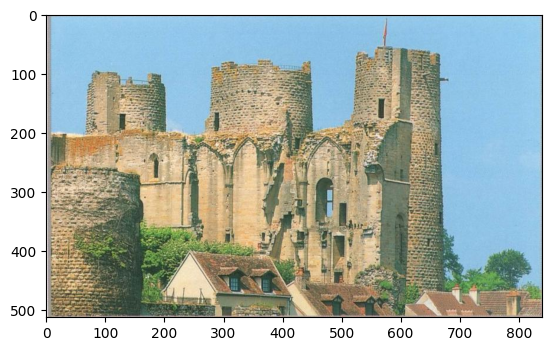

In [3]:
index = 2448
image_filename = splits["train"][index] + ".jpg"
image_path = "../artifacts/data/ADEChallengeData2016/images/training/" + image_filename
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

## Convert to HSV

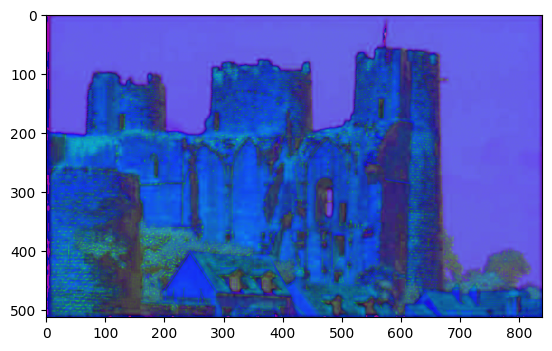

In [4]:
# convert image to HSV color space
hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
plt.imshow(hsv, cmap="hsv")

## Apply Color Slicing

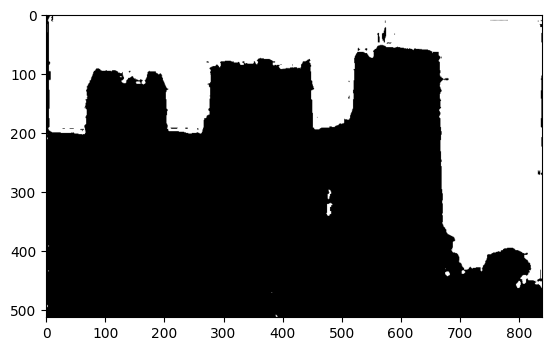

In [5]:
# Define the range of blue color values
lower_blue = np.array([100])
upper_blue = np.array([140])

# Threshold the image based on the color values
mask = cv2.inRange(hsv[:,:,0], lower_blue, upper_blue)
plt.imshow(mask, cmap='gray')


## Apply Gaussian Blur

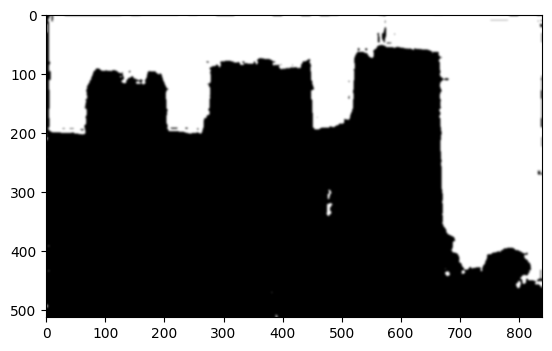

In [6]:
# blur the mask
blur = cv2.GaussianBlur(mask, (9, 9), 0)
plt.imshow(blur, cmap='gray')

## Thresholding

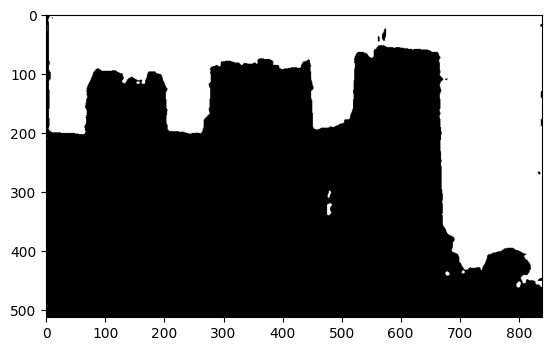

In [7]:
# apply thresholding to the blurred mask
ret, thresh = cv2.threshold(blur,0,255, cv2.THRESH_OTSU)
plt.imshow(thresh, cmap='gray')

## Apply Morphological Operation: Opening

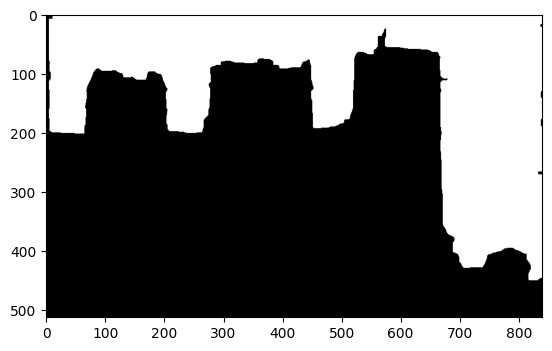

In [8]:
# apply opening to remove noise
kernel = np.ones((3, 3),np.uint8)
opening = cv2.morphologyEx(thresh, cv2.MORPH_OPEN, kernel, iterations = 5)
plt.imshow(opening, cmap='gray')

## Extract the sky region

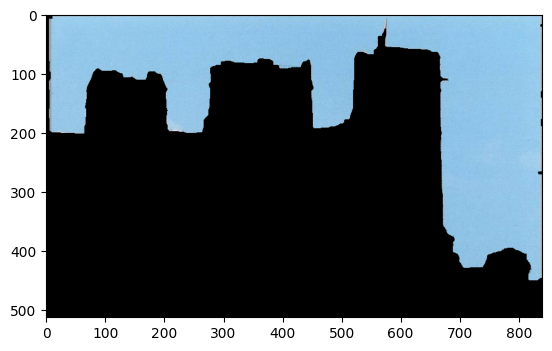

In [9]:

res = cv2.bitwise_and(image, image, mask=opening)
plt.imshow(res)

## Apply the Algorithm

In [10]:
from sky_segmentation.image_processing.segmentation import ColorBasedSkySegmentation

In [11]:
segmentation_model = ColorBasedSkySegmentation()

In [12]:
mask = segmentation_model(image_path=image_path)

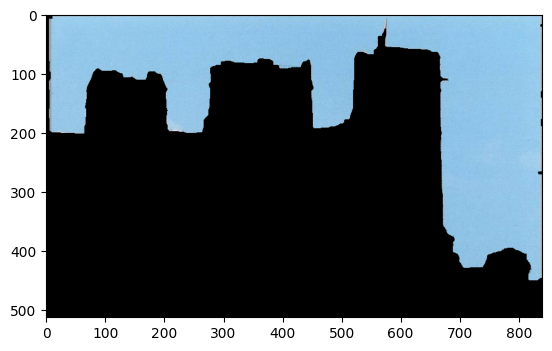

In [13]:
image = cv2.imread(image_path, cv2.IMREAD_COLOR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
res = cv2.bitwise_and(image, image, mask=(mask*255).astype(np.uint8))
plt.imshow(res)